# Periodic transit search

In this notebook, we use `nuance` to search for a periodic transit. Let's generate some data first

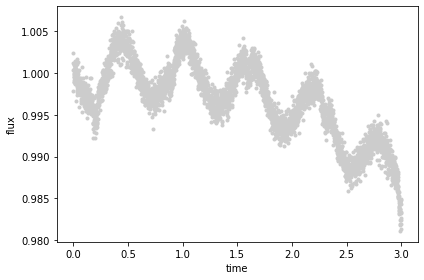

In [11]:
from nuance import Nuance, utils
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 3., 4000)
true = {"t0":0.2, "D":0.05, "P":0.7, "depth":2e-3}
(time, flux, error), X, kernel = utils.simulated(t=t, **true)
plt.plot(time, flux, ".", c="0.8")
plt.ylabel("flux")
plt.xlabel("time")

plt.tight_layout()

## The *linear search*

We start by instantiating a [Nuance](nuance.Nuance) object, and perform the *linear search* over all times (considered as potential transit epochs) and on a wide range of durations.

In [12]:
nu = Nuance(time, flux, error, kernel, X=X)

t0s = time.copy()
Ds = np.linspace(0.01, 0.2, 15)
nu.linear_search(t0s, Ds)

  0%|          | 0/4000 [00:00<?, ?it/s]

```{note}
Notice how we reused the same kernel used to generate the data. In practice, a kernel need to be properly set and its hyperparamter optimized. See the [GP optimization tutorial](gp.ipynb)
```

## The *periodic search*

We can now perform the periodic search and plot the SNR periodogram

  0%|          | 0/4000 [00:00<?, ?it/s]

epoch: 0.199
duration: 0.051
period: 0.700


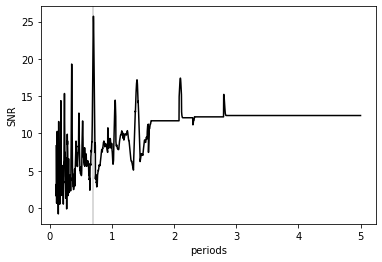

In [13]:
periods = np.linspace(0.1, 5, 4000)
search = nu.periodic_search(periods)

t0, D, P = search.best
plt.plot(search.periods, search.Q_snr, c="k")

plt.axvline(P, c="k", alpha=0.2)
plt.xlabel("periods"); plt.ylabel("SNR")

print("\n".join([f"{n}: {v:.3f}" for n, v in zip(["epoch", "duration", "period"], [t0, D, P])]))

And to plot the corresponding phase folded model

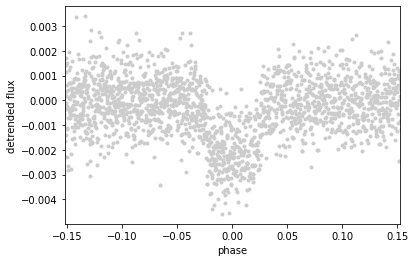

In [14]:
linear, astro, noise = nu.models(t0, D, P)
phi = utils.phase(time, t0, P)

plt.plot(phi, flux-(linear+noise), ".", c="0.8")
plt.xlabel("phase"); plt.ylabel("detrended flux")
_ = plt.xlim(-3*D, 3*D)

against the injected one

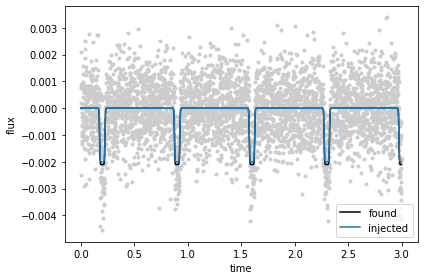

In [20]:
plt.plot(time, flux-noise-linear, ".", c="0.8")
plt.plot(time, astro, c="k", label="found")
plt.plot(time, true["depth"]*utils.periodic_transit(t, D=true["D"], t0=true["t0"], P=true["P"]),  c="C0", label="injected")
plt.legend()
plt.ylabel("flux")
plt.xlabel("time")

plt.tight_layout()

```{note}
If we want to search for another planetary candidate, we can mask the current candidate and reuse the *linear search*, only the *periodic search* needs to be reran. This is demonstrated in the [Multi-planetary search notebook](multi1.ipynb)
```